In [2]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [3]:
# Set the path to the directory containing the image stacks
stack_dir = 'D:/Temperature_images/RAW_2023-07-13/Stacks/'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue =len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")
    num_images = num_images_green
else:
    print("unequal stacks")

print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 68


In [4]:
#FOR TEMPERATURE CALIBRATION: Loop through all red/blue pairs of images in the stacks an get the RED/BLUE intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_blue_ratio = []
mean_red_blue_ratio =[]
red_blue_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / blue_stack[i]
    mean_red_blue_ratio.append(np.mean(ratio))
    red_blue_ratio.append(ratio)
    red_blue_std.append(np.std(ratio))


In [5]:
# Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = red_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

# CHANGE DEPENDING ON CALIBRATION
for image in red_blue_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[4.15281008 4.22098885 4.26448534]
 [4.10175598 4.17368209 4.23348395]
 [4.01084561 4.05644019 4.07953667]
 [4.01504703 4.0617768  4.08529113]
 [4.05292062 4.11450996 4.15804675]
 [4.01852583 4.06924589 4.09707063]
 [4.01724503 4.06536795 4.09113867]
 [4.03941074 4.09573872 4.12944397]
 [4.02632446 4.07940722 4.11031735]
 [4.01578672 4.06585529 4.09008106]
 [4.01519018 4.0636521  4.0870848 ]
 [4.01480421 4.06215799 4.08678103]
 [4.00751618 4.05275194 4.07560815]
 [3.99851882 4.04593348 4.06734758]
 [3.98544589 4.03842074 4.05957034]
 [3.96351146 4.0127635  4.03523184]
 [3.94050463 3.98958163 4.01076768]
 [3.91537097 3.9631311  3.98338933]
 [3.89261594 3.93810194 3.9575398 ]
 [3.86449384 3.91081261 3.93027553]
 [3.84214977 3.88700874 3.90672381]
 [3.81644627 3.86230802 3.88039147]
 [3.79151314 3.83713472 3.85473427]
 [3.76796546 3.81372273 3.83263563]
 [3.74271206 3.78739101 3.80651976]
 [3.72089207 3.76586903 3.78405465]
 [3.69545377 3.74066653 3.75941879]
 [3.67396513 3.71795575 3.73

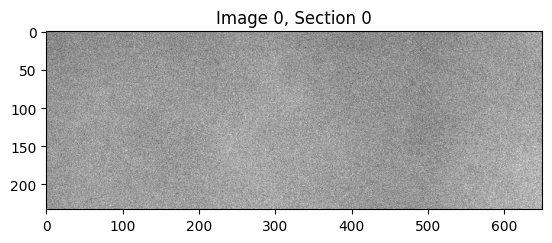

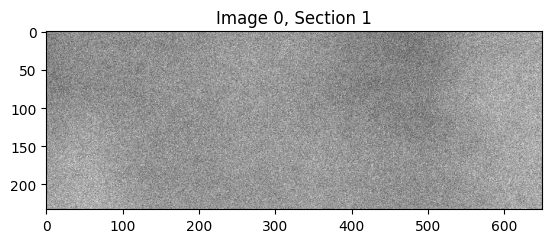

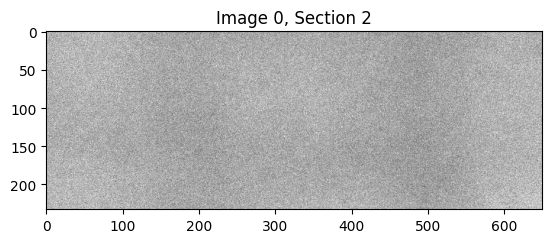

In [6]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [7]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[4.2127614220524565, 4.169640674408491, 4.048940821444002, 4.054038319261461, 4.1084924409578205, 4.061614114603675, 4.057917218729038, 4.088197809914249, 4.072016342720247, 4.057241023546896, 4.05530902796999, 4.054581077646007, 4.045292089445923, 4.037266625214239, 4.027812322457947, 4.003835598619707, 3.980284647597999, 3.9539637979089712, 3.929419224097583, 3.901860658680743, 3.878627443614588, 3.8530485876099303, 3.8277940454310646, 3.804774606415492, 3.778874277808006, 3.7569385820907244, 3.7318463619086213, 3.710101662831858, 3.685948507015292, 3.6641165197744363, 3.6426483206748035, 3.6213325040089397, 3.6037503919246254, 3.5851157890147314, 3.57262358886129, 3.559079235746378, 3.5439301028272117, 3.526348507480107, 3.5129235482608014, 3.501040834877782, 3.488726800771655, 3.47918144741292, 3.4671990933324395, 3.4589334583268383, 3.447853047951679, 3.4403859259930187, 3.431047285030294, 3.4233282921212695, 3.4152573805942303, 3.4065368977130226, 3.400248523423706, 3.39196278379

In [8]:
# Set the path to the directory containing the image filenames
files_dir = 'D:/Temperature_images/RAW_2023-07-13/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][15:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0            3.661         4.212761    2178.322257      2606.357277   
1            4.661         4.169641    2145.621053      2579.336644   
2            5.340         4.048941    2052.535112      2501.783086   
3            5.341         4.054038    2055.942270      2503.935763   
4            5.561         4.108492    2098.979020      2540.601752   
..             ...              ...            ...              ...   
63          19.251         3.327748    1518.758431      2001.877952   
64          19.371         3.322053    1515.404842      1999.278064   
65          19.620         3.301506    1501.352068      1986.077057   
66          19.750         3.294125    1496.717736      1981.753901   
67          19.860         3.286749    1491.739000      1976.950207   

    Intensity Blue  Std Ratio    Std Red  Std Green   Std Blue  
0       517.187343   0.045961  87.236746  86.133545  17.820002  
1       514.63561

In [33]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('D:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv',header=True, index=False)

In [9]:
df_ratios = pd.read_csv('D:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv')
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0            3.661         4.212761    2178.322257      2606.357277   
1            4.661         4.169641    2145.621053      2579.336644   
2            5.340         4.048941    2052.535112      2501.783086   
3            5.341         4.054038    2055.942270      2503.935763   
4            5.561         4.108492    2098.979020      2540.601752   
..             ...              ...            ...              ...   
63          19.251         3.327748    1518.758431      2001.877952   
64          19.371         3.322053    1515.404842      1999.278064   
65          19.620         3.301506    1501.352068      1986.077057   
66          19.750         3.294125    1496.717736      1981.753901   
67          19.860         3.286749    1491.739000      1976.950207   

    Intensity Blue  Std Ratio    Std Red  Std Green   Std Blue  
0       517.187343   0.045961  87.236746  86.133545  17.820002  
1       514.63561

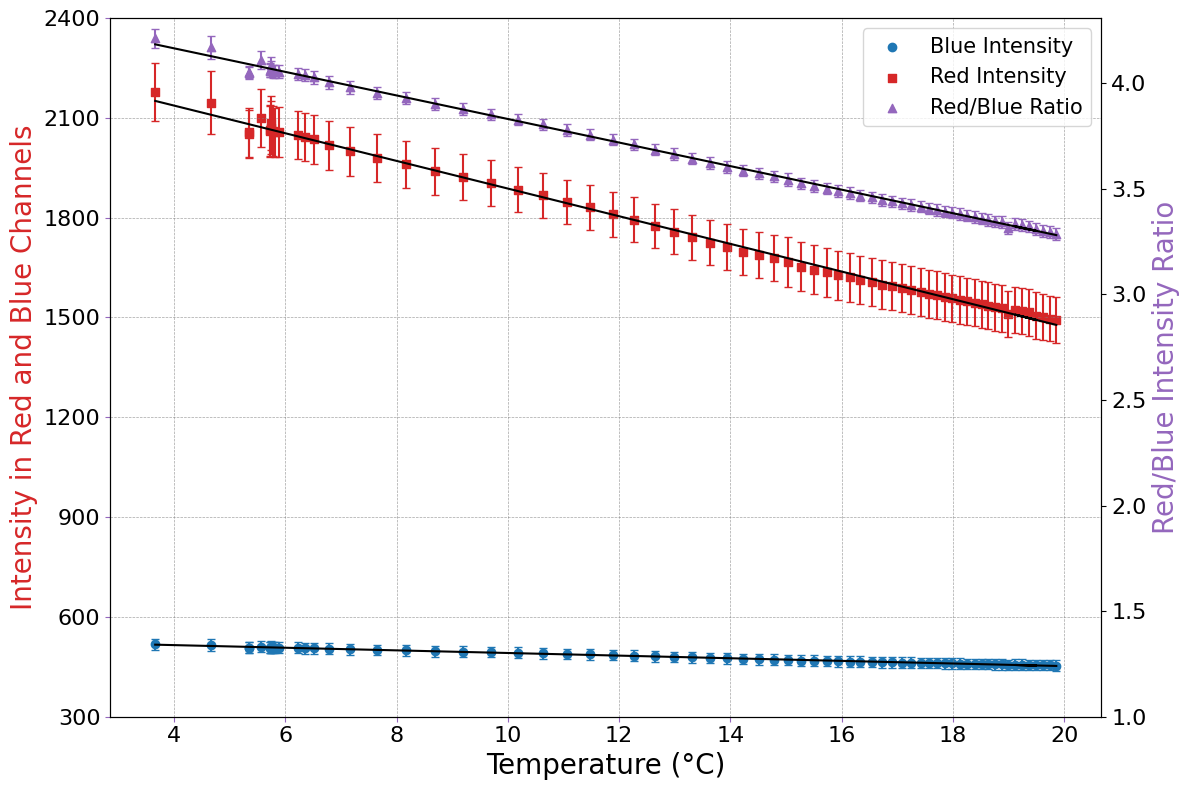

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_ratios is your DataFrame and it's already defined

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define colors from the tab10 color palette
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Blue Intensity
ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], color=colors[0], label='Blue Intensity', alpha=1)
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], yerr=df_ratios['Std Blue'], color=colors[0], fmt='none', capsize=3)
ax1.plot(df_ratios['Temperature/O2'], np.polyval(np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], 1), df_ratios['Temperature/O2']), color='black')

# Red Intensity
ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], color=colors[3], label='Red Intensity', alpha=1, marker="s")
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], yerr=df_ratios['Std Red'], color=colors[3], fmt='none', capsize=3)
ax1.plot(df_ratios['Temperature/O2'], np.polyval(np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], 1), df_ratios['Temperature/O2']), color='black')

# Customize ax1 (primary axis)
ax1.set_xlabel('Temperature (°C)', fontsize=20, color='black')
ax1.set_ylabel('Intensity in Red and Blue Channels', fontsize=20, color=colors[3])
ax1.tick_params(axis='both', labelsize=16,  color=colors[4])
ax1.set_yticks(np.arange(300, 2500, 300))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Secondary axis for intensity ratio
ax2 = ax1.twinx()
ax2.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Ratio'], color=colors[4], label='Red/Blue Ratio', alpha=1, marker="^")
ax2.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Ratio'], yerr=df_ratios['Std Ratio'], color=colors[4], fmt='none', capsize=3)
ax2.plot(df_ratios['Temperature/O2'], np.polyval(np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Ratio'], 1), df_ratios['Temperature/O2']), color='black')

# Customize ax2 (secondary axis)
ax2.set_ylabel('Red/Blue Intensity Ratio', fontsize=20, color=colors[4])
ax2.tick_params(axis='y', labelsize=16, colors="black")
ax2.set_yticks(np.arange(1, 4.5, 0.5))

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=15)

# Adjust spacing and show plot
fig.tight_layout()
plt.savefig("Temperature_cali.png", dpi=300)
plt.show()


In [10]:
import scipy.interpolate

# Get the data points for the ratio plot
x_data = df_ratios['Tempeartue/O2'].values
y_data = df_ratios['Intensity Ratio'].values

# Interpolate the data points to extend to 0 to 40 degrees Celsius
f = scipy.interpolate.interp1d(x_data, y_data, kind='linear', fill_value='extrapolate')

# Get the interpolated values for 0 and 40 degrees Celsius
x_new = np.array([0, 40])
y_new = f(x_new)

print(y_new)


[4.18515325 2.08014169]
